# importing the modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# adding the colors for each type

In [3]:
colors = {
	'Normal': '#A8A77A',
	'Fire': '#EE8130',
	'Water': '#6390F0',
	'Electric': '#F7D02C',
	'Grass': '#7AC74C',
	'Ice': '#96D9D6',
	'Fighting': '#C22E28',
	'Poison': '#A33EA1',
	'Ground': '#E2BF65',
	'Flying': '#A98FF3',
	'Psychic': '#F95587',
	'Bug': '#A6B91A',
	'Rock': '#B6A136',
	'Ghost': '#735797',
	'Dragon': '#6F35FC',
	'Dark': '#705746',
	'Steel': '#B7B7CE',
    'Fairy': '#D685AD',
}
gen_colors=['#041a24','#17232b','#174b4f','#1b5655','#1f7884','#2ddec0','#42aa79','#58c097','#36cb8b']

# importing the database

In [4]:
filepath=r"C:\Users\devan\Downloads\pokemon_data.csv"
data=pd.read_csv(filepath)

df=pd.DataFrame(data)

# removing useless columns and putting dex number as index

In [5]:
df.drop(columns=['catch_rate','base_friendship','base_exp','growth_rate','percent_male','percent_female','egg_group1','egg_group2','egg_cycles','ev_yield'],inplace=True)

In [6]:
df.set_index('dexnum',inplace=True)
print(df.shape)
print(df.info())

(1025, 18)
<class 'pandas.core.frame.DataFrame'>
Index: 1025 entries, 1 to 1025
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1025 non-null   object 
 1   generation      1025 non-null   int64  
 2   type1           1025 non-null   object 
 3   type2           526 non-null    object 
 4   species         1025 non-null   object 
 5   height          1025 non-null   float64
 6   weight          1025 non-null   float64
 7   ability1        1025 non-null   object 
 8   ability2        858 non-null    object 
 9   hidden_ability  530 non-null    object 
 10  hp              1025 non-null   int64  
 11  attack          1025 non-null   int64  
 12  defense         1025 non-null   int64  
 13  sp_atk          1025 non-null   int64  
 14  sp_def          1025 non-null   int64  
 15  speed           1025 non-null   int64  
 16  total           1025 non-null   int64  
 17  special_group   1025 non-nu

# visualizing some data

## which type has the best stats 

In [7]:
type_df = df.melt(id_vars=df.drop(columns=['type1', 'type2']).columns, value_vars=['type1', 'type2'],var_name='type_slot', value_name='type').copy()
group_type_df=type_df.groupby('type')

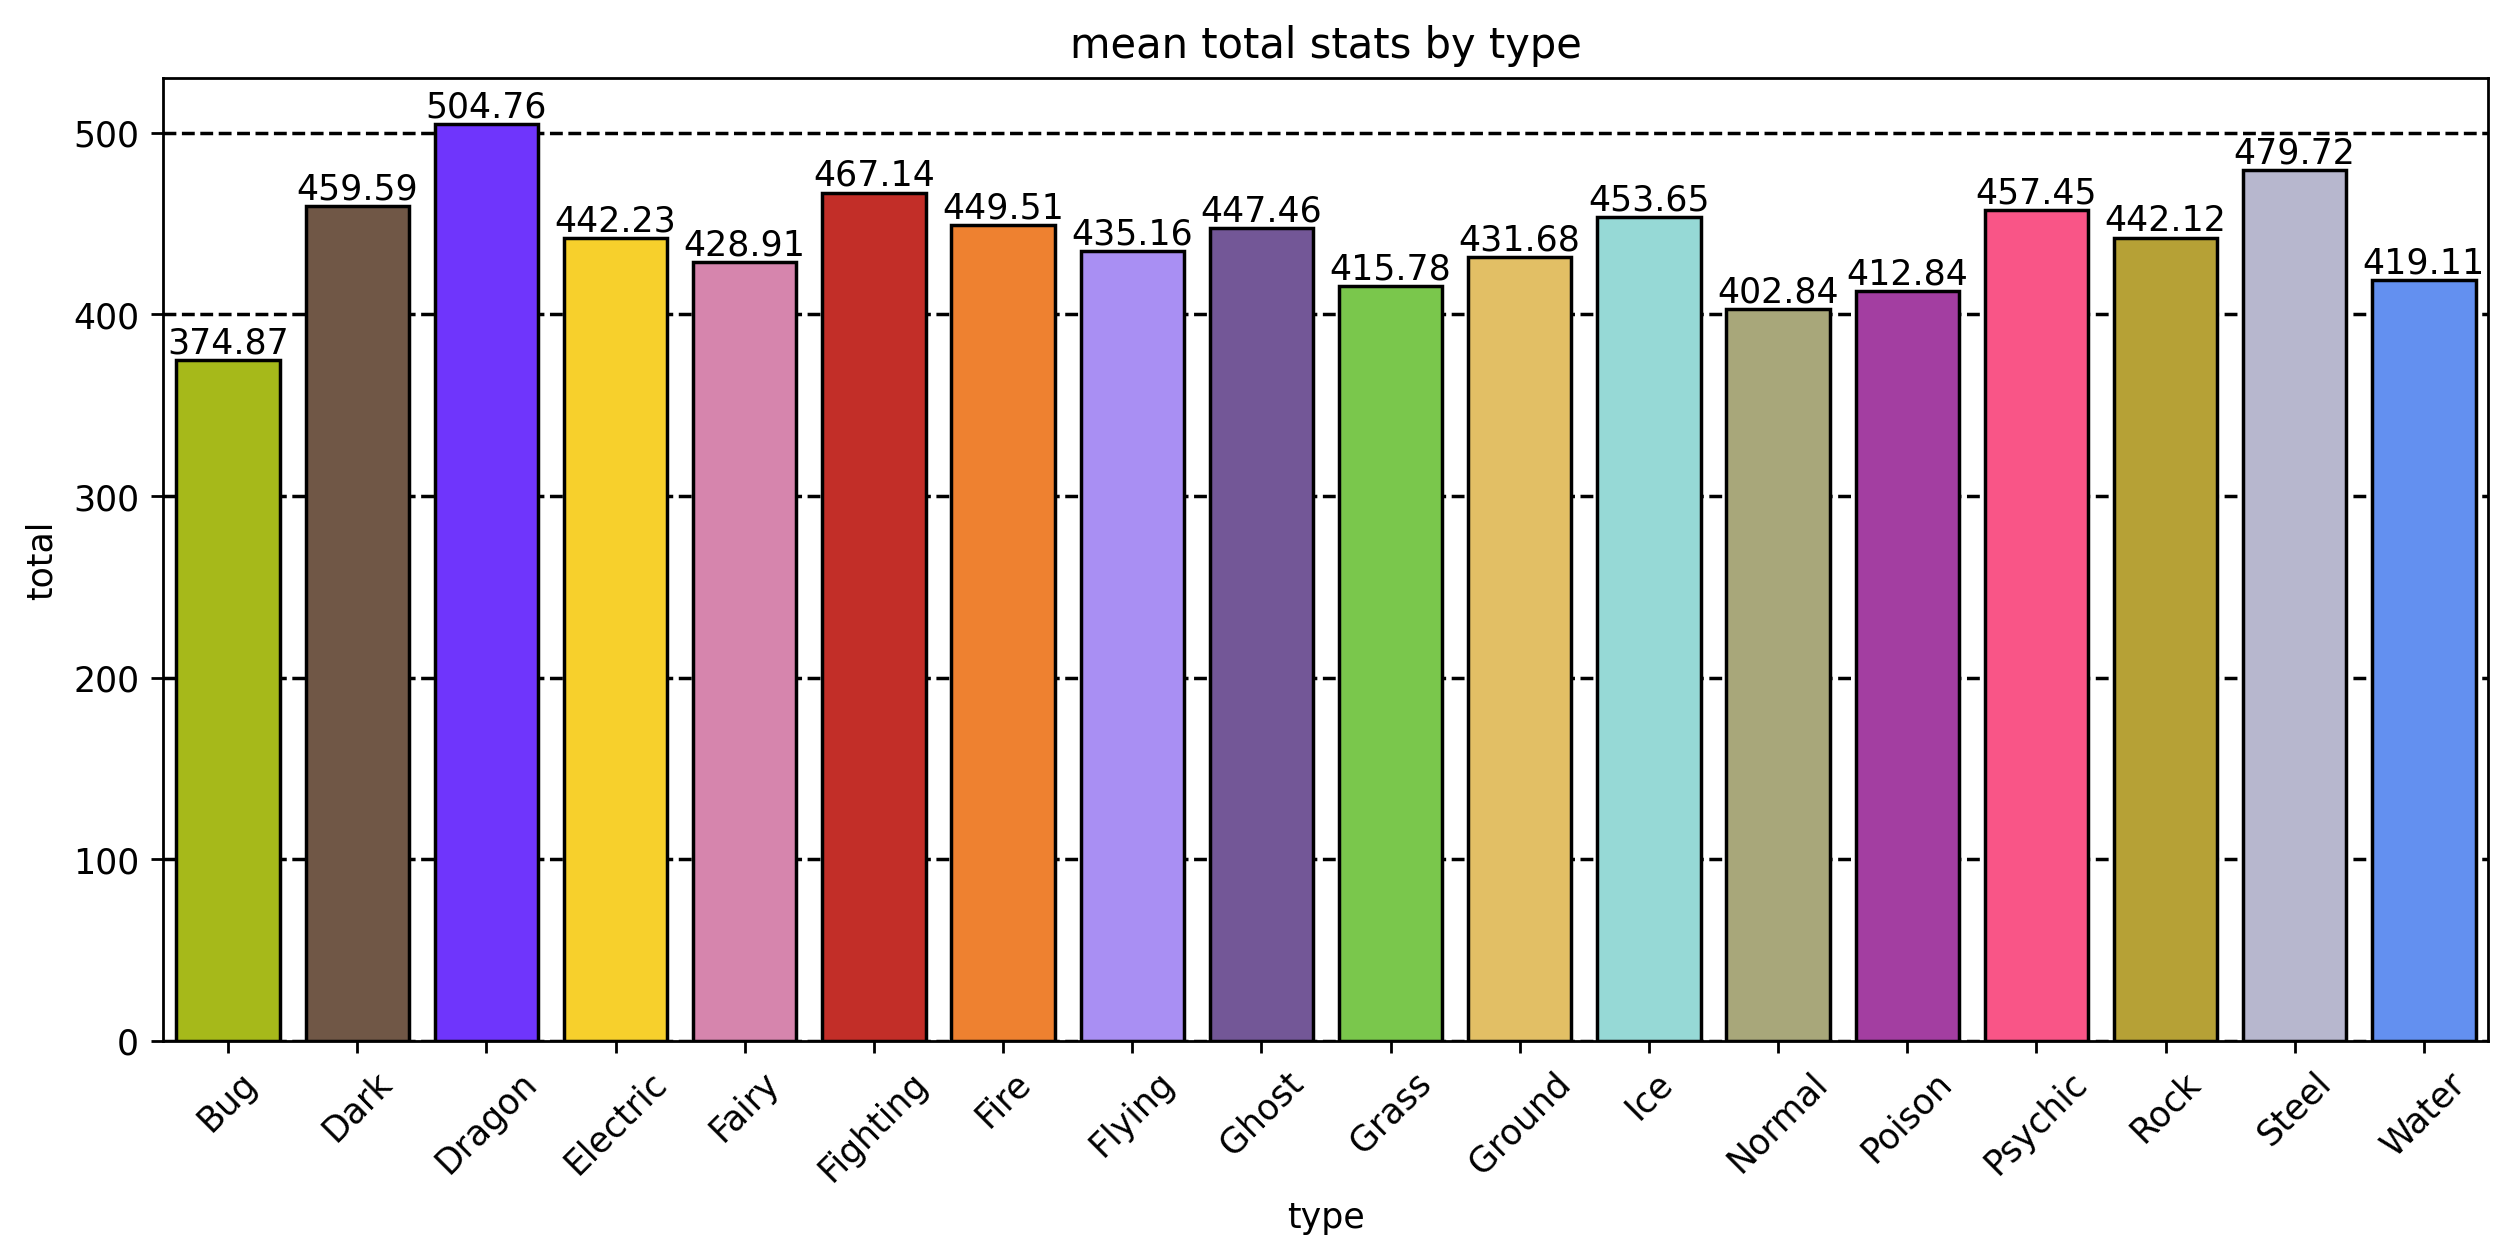

In [8]:
type_total_avg=group_type_df['total'].mean()

type_total_avg_df=type_total_avg.to_frame()
plt.figure(figsize=(12,5),dpi=250)
plot =sns.barplot(data=type_total_avg_df,x='type',y='total',hue='type',palette=colors,edgecolor='black',saturation=1,zorder=2)
plt.xticks(rotation=45)
plot.set_title('mean total stats by type')
plot.grid(axis='y',linestyle='--',linewidth=1,color='black',zorder=0)
for container in plot.containers:
    plot.bar_label(container,fmt="%.2f")
plt.show()

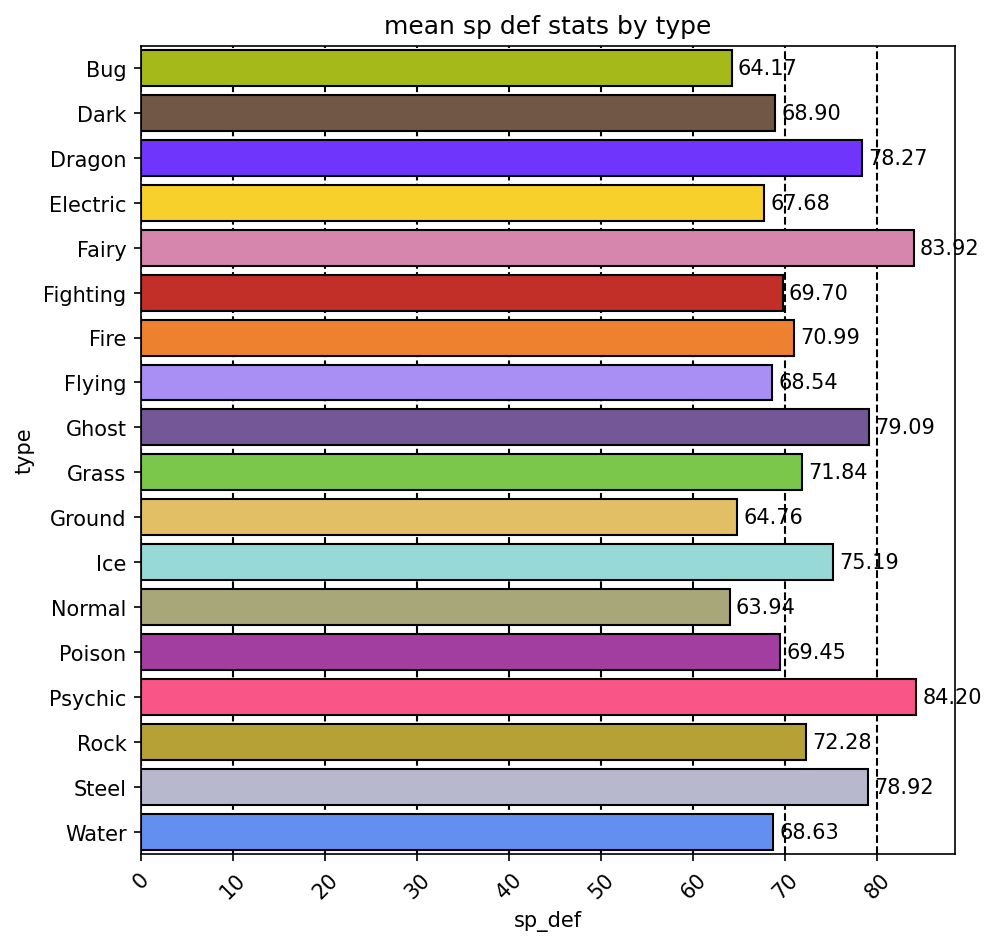

In [9]:
# mean sp defence

type_sp_def_avg=group_type_df['sp_def'].mean()

type_sp_def_avg_df=type_sp_def_avg.to_frame()
plt.figure(figsize=(7,7),dpi=150)
plot =sns.barplot(data=type_sp_def_avg_df,y='type',x='sp_def',hue='type',palette=colors,edgecolor='black',saturation=1,zorder=2)
plt.xticks(rotation=45)
plot.set_title('mean sp def stats by type')
plot.grid(axis='x',linestyle='--',linewidth=1,color='black',zorder=0)
for container in plot.containers:
    plot.bar_label(container,fmt="%.2f",padding=3)
plt.show()

## which generation has the best stats

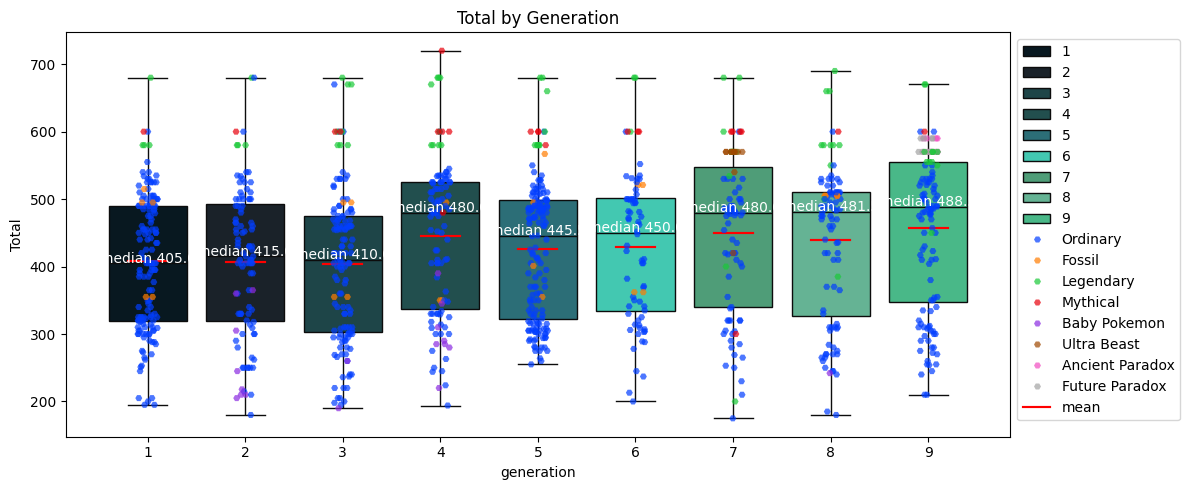

In [10]:
plt.figure(figsize=(12,5))

sns.boxplot(data=df,x='generation',y='total',palette=gen_colors,hue='generation')
sns.stripplot(data=df, x='generation', y='total', jitter=0.1, alpha=0.7,size=5,marker='H',hue='special_group',palette='bright')

gen_df=df.groupby('generation')
group_means = gen_df['total'].mean()

for i, (group, mean) in enumerate(group_means.items()):
    plt.plot([i-0.2,i+0.2], [mean,mean], color='red', lw=1.55,label='mean' if i==0 else "") 

for i, group in enumerate(df['generation'].unique()):
    median_val = df[df['generation'] == group]['total'].median()
    plt.text(i, median_val + 1, f"median {median_val:.1f}", ha='center', color='white')

plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.title("Total by Generation")
plt.ylabel("Total")
plt.tight_layout()
plt.show()


## scatter plot for attack vs defense

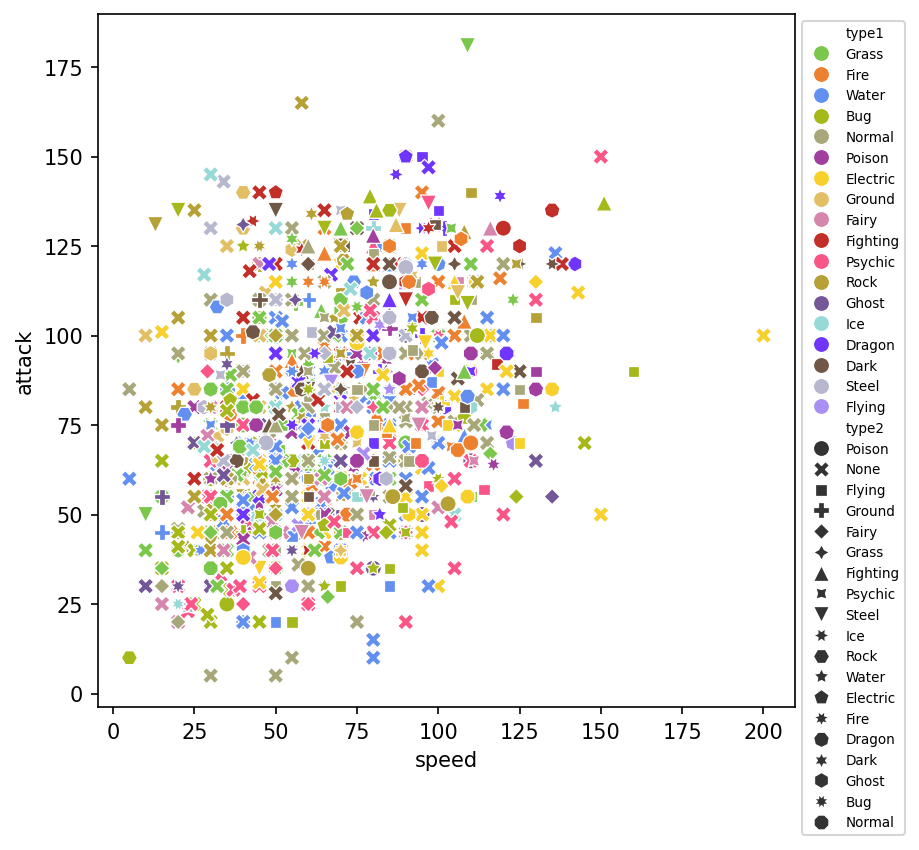

In [11]:
plt.figure(figsize=(6,6),dpi=150)
df['type2']=df['type2'].fillna('None')
sns.scatterplot(data=df,x='speed',y='attack', hue='type1', style='type2',palette=colors,s=60)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),fontsize=6.5)
plt.show()

## multiple histogram for all the stats grouping by generation

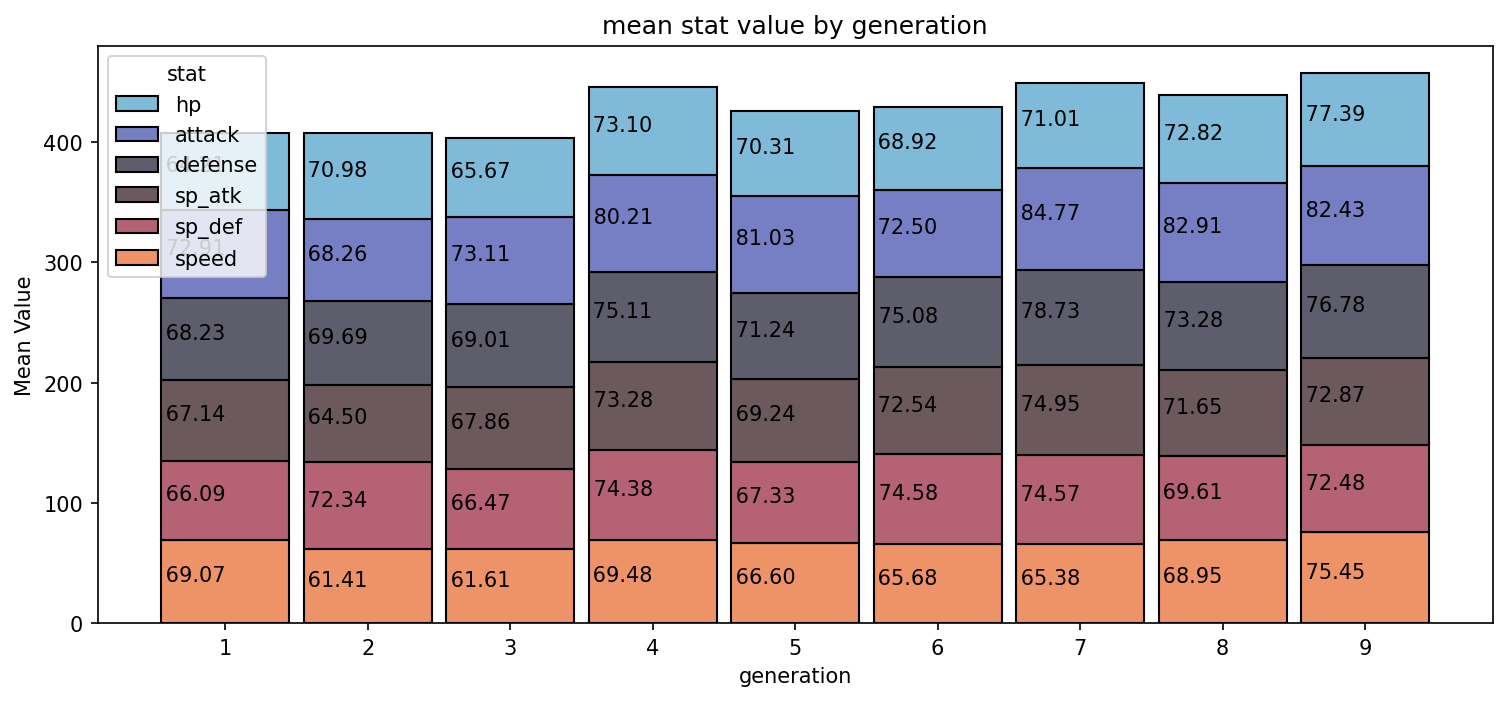

In [12]:
melt_df = df.melt(id_vars=df.drop(columns=['hp','attack','defense','sp_atk','sp_def','speed']).columns, value_vars=['hp','attack','defense','sp_atk','sp_def','speed'],var_name='stat', value_name='value').copy()
mean_gen_df=gen_df[['hp','attack','defense','sp_atk','sp_def','speed','total']].mean()
mean_gen_df=mean_gen_df.reset_index()
melt_mean_gen_df=mean_gen_df.melt(id_vars='generation',value_vars=['hp','attack','defense','sp_atk','sp_def','speed'],var_name='stat', value_name='value').copy()

plt.figure(figsize=(12,5),dpi=150)
ax= sns.histplot(data=melt_mean_gen_df,x='generation',hue='stat',weights='value',multiple='stack',stat='count',discrete=True,shrink=0.9,palette='icefire')
plt.xticks(ticks=range(1,10))
plt.ylabel("Mean Value")
plt.title("mean stat value by generation")
for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2 
    height = patch.get_height()
    ax.annotate(f'{height : .2f}',xy=(x,y),ha='right')

plt.show()

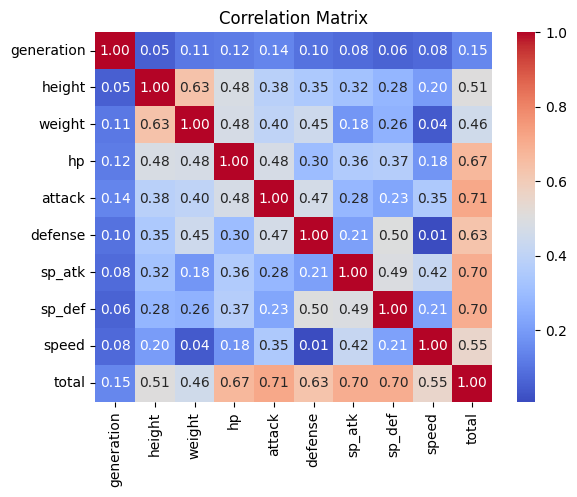

In [14]:
# Correlation heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()